<h1>Homework 6</h1>

<h3>Seymone Gugneja and Michael Trofimov</h3>

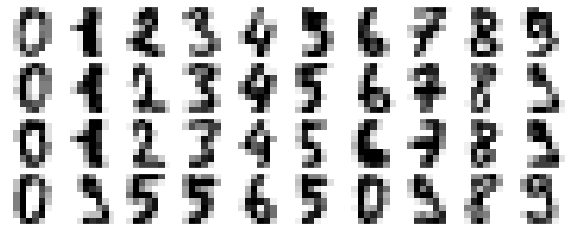

In [9]:
#provided code

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()
from sklearn import datasets, svm, metrics


# The digits dataset
digits = datasets.load_digits()

def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

In [14]:
#Use PCA to reduce data dimensionality
# add labels
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

labels = list(zip(digits.images, digits.target))
samples = len(digits.images)
data = digits.images.reshape((samples, -1))

X = StandardScaler().fit_transform(data)

z = round(digits.data.shape[1]*.8)
pca = PCA(n_components=z, whiten=True)

X_pca = pca.fit_transform(X)
print('Number of features (original) : ', X.shape[1])
print('Number of features (reduced) : ', X_pca.shape[1])

Number of features (original) :  64
Number of features (reduced) :  51


In [25]:
# linear performance
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

parameters = {'C': [0.1,1,10,100],
             'gamma': [1,0.1,0.01,0.001,0.0001],
             'kernel': ['linear']}

grid = RandomizedSearchCV(SVC(), parameters, refit = True, verbose = 1, cv = 5)
grid.fit(X_pca[:samples//2], digits.target[:samples//2])

#predict value of digit, second half
expected = digits.target[samples//2:]
predicted = grid.predict(X_pca[samples//2:])

print("The best parameters after RandomSearchCV: ", grid.best_params_)
print("The best estimator: ", grid.best_estimator_)
print("Classifier report:\n%s\n " % (metrics.classification_report(expected, predicted)))


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The best parameters after RandomSearchCV:  {'kernel': 'linear', 'gamma': 0.1, 'C': 1}
The best estimator:  SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Classifier report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        88
           1       0.89      0.95      0.91        91
           2       0.96      0.95      0.96        86
           3       0.92      0.87      0.89        91
           4       0.94      0.90      0.92        92
           5       0.86      0.93      0.89        91
           6       0.93      0.95      0.94        91
           7       0.96      0.91      0.94        89
           8       0.87      0.84      0.86        88
           9       0.88      0.88      0.88        92

    accuracy                           0.92      

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.9s finished


In [18]:
# Polynomial performance
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

parameters = {'C': [0.1,1,10,100],
             'gamma': [1,0.1,0.01,0.001,0.0001],
             'kernel': ['poly']}

grid = RandomizedSearchCV(SVC(), parameters, refit = True, verbose = 1, cv = 5)
grid.fit(X_pca[:samples//2], digits.target[:samples//2])

#predict value of digit, second half
expected = digits.target[samples//2:]
predicted = grid.predict(X_pca[samples//2:])

print("The best parameters after RandomSearchCV: ", grid.best_params_)
print("The best estimator: ", grid.best_estimator_)
print("Classifier report:\n%s\n " % (metrics.classification_report(expected, predicted)))


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The best parameters after RandomSearchCV:  {'kernel': 'poly', 'gamma': 0.01, 'C': 100}
The best estimator:  SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Classifier report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.85        88
           1       0.92      0.97      0.94        91
           2       0.96      0.88      0.92        86
           3       0.82      0.93      0.87        91
           4       1.00      0.82      0.90        92
           5       0.95      0.81      0.88        91
           6       0.88      1.00      0.94        91
           7       0.93      0.79      0.85        89
           8       0.96      0.86      0.91        88
           9       0.87      0.87      0.87        92

    accuracy                           0.89    

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    3.9s finished


In [19]:
# radial performance
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

parameters = {'C': [0.1,1,10,100],
             'gamma': [1,0.1,0.01,0.001,0.0001],
             'kernel': ['rbf']}

grid = RandomizedSearchCV(SVC(), parameters, refit = True, verbose = 1, cv = 5)
grid.fit(X_pca[:samples//2], digits.target[:samples//2])

#predict value of digit, second half
expected = digits.target[samples//2:]
predicted = grid.predict(X_pca[samples//2:])

print("The best parameters after RandomSearchCV: ", grid.best_params_)
print("The best estimator: ", grid.best_estimator_)
print("Classifier report:\n%s\n " % (metrics.classification_report(expected, predicted)))


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The best parameters after RandomSearchCV:  {'kernel': 'rbf', 'gamma': 0.01, 'C': 10}
The best estimator:  SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Classifier report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        88
           1       0.94      0.96      0.95        91
           2       0.96      0.95      0.96        86
           3       0.99      0.84      0.90        91
           4       0.87      0.91      0.89        92
           5       0.89      0.96      0.92        91
           6       0.98      0.92      0.95        91
           7       0.95      0.97      0.96        89
           8       0.92      0.90      0.91        88
           9       0.90      0.95      0.92        92

    accuracy                           0.93       8

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    3.9s finished
/Users/seymonegugneja/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


The best model is radial performance, with a 93% accuracy score.
The second best model is linear performance with a 92% accuracy score.
The worst model is polynomial performance with a 89% accuracy score.